In [2]:
import sys
sys.path.append('/home/kewenz/analog')
import matplotlib.pyplot as plt
import numpy as np
import torch
from examples.plotting_utils import (
    CAP_SIZE,
    MARKER_SIZE,
    get_color,
    get_name,
    init_plotting,
)

from examples.brittleness.pipeline import (
    get_remove_intervals,
)

In [1]:
def main(data_name: str) -> None:
    algo_name_lst = [
        "random",
        # "pca1e-06",
        # "noLoraEkfac",
        # "pca0.0001",
        # "loraEkfacrandom64",
        # "loraEkfacorthogonal64",
        # "loraEkfacpca64",
        # "loraEkfacrandom64_damping0.001",
        # "loraEkfacrandom64_damping1e-05",
        # "noLoraEkfacAugTrueFisher",
        # "noLoraEkfac_10_aug_trueFisher",
        # "noLoraEkfac_10_true_fisher",
        # "noLoraEkfacrandom16_singleModel_aug_trueFisher"
        # "lora64random_full_covariance_10",
        # "lora64random_full_covariance_aug_10",
        # "initrandom_rank64_use_loraTrue_use_full_covarianceTrue_sampleFalse_ekfacFalse_damping1e-10_use_augmented_dataFalse_grad_simFalse_tag_model_id_10",
        "initrandom_rank64_use_loraTrue_use_full_covarianceTrue_sampleFalse_ekfacFalse_damping1e-10_use_augmented_dataFalse_grad_simFalse_tag_model_id0",
        "initrandom_rank64_use_loraFalse_use_full_covarianceFalse_sampleFalse_ekfacFalse_damping1e-10_use_augmented_dataFalse_grad_simFalse_tag_model_id0",
        # "trak_30",
        "initrandom_rank64_use_loraTrue_use_full_covarianceFalse_sampleFalse_ekfacTrue_damping1e-10_use_augmented_dataFalse_grad_simFalse_tag_model_id0",
        # "trak_30_model0", #invalid
        "Trak_30_model0_epoch25_our_ckpt",
        # "trak_30_model0_epoch25_their_ckpt", #invalid
        # "initrandom_rank64_use_loraTrue_ekfacTrue_damping1e-10_tag_model_id0_logit_lossTrue",
        "initpca_rank64_lorapca_hessianekfac_damping1e-10_tag_model_id0",
        "rank64_damping1e-10_tag_model_id0",
    ]

    base = 0.0
    intervals = [200, 400, 600, 800, 1000, 1200]
    # init_plotting()

    for algo_name in algo_name_lst:
        results = torch.load(
            f"../../files/ensemble_brittleness_results/data_{data_name.lower()}/{algo_name}.pt"
        )

        results = np.array(results["results"])
        avg_results = results.sum(0) / results.shape[0]
        plt.plot(
            [0] + intervals,
            [base] + list(avg_results),
            "o-",
            label=get_name(algo_name),
            c=get_color(algo_name),
            markersize=MARKER_SIZE,
        )

    plt.legend(ncol=2)
    plt.title("Dataset: CIFAR-10 (ResNet-9)")

    plt.ylabel("Frac. of Misclassified Test Images")
    plt.xlabel("Number of Training Samples Removed")
    plt.grid()
    plt.show()
    plt.clf()


if __name__ == "__main__":
    main(data_name="cifar10")

NameError: name 'torch' is not defined

In [ ]:
ans = None
algo_name = "loraEkfacpca64_10"
data_name = "cifar10"
for startIdx in range(0,100,10):
    results = torch.load(
        f"../../files/ensemble_brittleness_results/data_{data_name.lower()}/{algo_name}_{startIdx}_{startIdx+10}.pt"
    )["results"]
    results = np.array(results)
    if ans is None:
        ans = results
    else:
        ans = np.vstack((ans, results))
torch.save({"results": ans},  (f"../../files/ensemble_brittleness_results/data_{data_name.lower()}/{algo_name}.pt"))

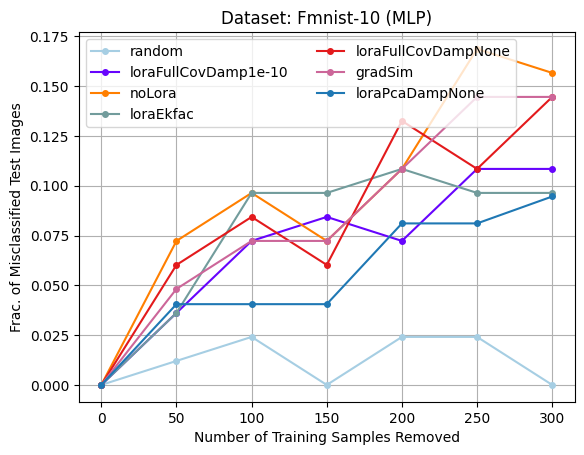

<Figure size 640x480 with 0 Axes>

In [7]:
def main(data_name: str) -> None:
    algo_name_lst = [
        "random",
        # "representation_similarity_dot",
        # "tracin_dot",
        # "tracin_cos",
        # "trak",
        # "if_d1e-08",
        # "unif_average",
        # "unif_segment",
        # "pca1e-06",
        # "noLoraEkfac",
        # "loraEkfacrandom32",
        # "loraEkfacrandom64",
        # "loraEkfacrandom16",
        # "noLoraEkfac",
        # "initrandom_rank64_use_loraTrue_use_full_covarianceTrue_sampleFalse_ekfacFalse_damping1e-10_use_augmented_dataFalse_grad_simFalse_tag_model_id_10",
        "initrandom_rank64_use_loraTrue_use_full_covarianceTrue_sampleFalse_ekfacFalse_damping1e-10_use_augmented_dataFalse_grad_simFalse_tag_model_id0",
        # "initrandom_rank64_use_loraTrue_use_full_covarianceTrue_sampleFalse_ekfacFalse_damping1e-10_use_augmented_dataFalse_grad_simFalse_tag_model_id_10",
        # "trak_30_single",
        "initrandom_rank64_damping1e-10_tag_model_id0",
        "initrandom_rank64_use_loraTrue_ekfacTrue_damping1e-10_tag_model_id0",
        "initrandom_rank64_use_loraTrue_use_full_covarianceTrue_dampingNone_tag_model_id0",
        # "initpca_rank64_lorapca_hessianekfac_damping1e-10_tag_model_id0",
        "rank64_damping1e-10_tag_model_id0",
        "initpca_rank64_lorapca_hessianekfac_dampingNone_tag_model_id0"
    ]

    base = 0.0
    intervals = [50, 100, 150, 200, 250, 300]

    # init_plotting()

    for algo_name in algo_name_lst:
        results = torch.load(
            f"../../files/ensemble_brittleness_results/data_{data_name.lower()}/{algo_name}.pt"
        )

        results = np.array(results["results"])
        avg_results = results.sum(0) / results.shape[0]
        plt.plot(
            [0] + intervals,
            [base] + list(avg_results),
            "o-",
            label=get_name(algo_name),
            c=get_color(algo_name),
            markersize=MARKER_SIZE,
        )

    plt.legend(ncol=2)
    plt.title("Dataset: Fmnist-10 (MLP)")

    plt.ylabel("Frac. of Misclassified Test Images")
    plt.xlabel("Number of Training Samples Removed")
    plt.grid()
    plt.show()
    plt.clf()


if __name__ == "__main__":
    main(data_name="fmnist")

In [ ]:
intervals

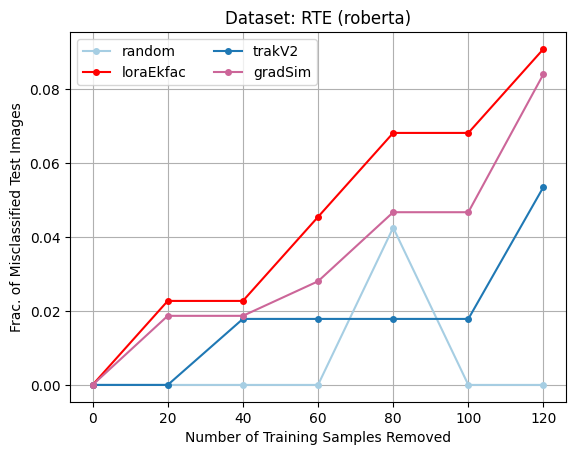

<Figure size 640x480 with 0 Axes>

In [2]:
def main(data_name: str) -> None:
    algo_name_lst = [
        "random",
        "initrandom_rank64_lorarandom_hessianekfac_damping1e-10_tag_model_id0",
        "TrakRobertaV2",
        "rank64_dampingNone_tag_model_id0"
    ]

    base = 0.0
    intervals = get_remove_intervals(data_name)  # Updated intervals


    for algo_name in algo_name_lst:
        results = torch.load(
            f"../../files/ensemble_brittleness_results/data_{data_name.lower()}/{algo_name}.pt"
        )

        results = np.array(results["results"])
        avg_results = results.sum(0) / results.shape[0]
        plt.plot(
            [0] + intervals,
            [base] + list(avg_results),
            "o-",
            label=get_name(algo_name),
            c=get_color(algo_name),
            markersize=MARKER_SIZE,
        )

    plt.legend(ncol=2)
    plt.title("Dataset: RTE (roberta)")

    plt.ylabel("Frac. of Misclassified Test Images")
    plt.xlabel("Number of Training Samples Removed")
    plt.grid()
    plt.show()
    plt.clf()


if __name__ == "__main__":
    main(data_name="rte")